#### FEATURE ENGINEERING 
Feature engineering is a technique that leverages data to create new variables that aren't in the 
training set and converts raw data into a format that can be used for building the machine learning  model. <br/>
It can produce new features for both supervised and unsupervised learning, with the goal of 
simplifying and speeding up data transformations <b> while also enhancing the performance of the machine learning model.</b>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
%matplotlib inline


### Section-1 (a)

In [5]:
df = pd.read_excel('Housing.xlsx')

# df = pd.read_excel('Housing.xlsx')

### For csv file we use this command
# df = pd.read_csv('Datasets\Churn_Modelling.csv')
# df = pd.read_csv('Datasets\wine.csv')
print(df.shape)
df.tail(10)

(546, 13)


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
536,537,82500,6000,3.0,2,4,yes,no,no,no,yes,0,no
537,538,83000,4800,3.0,1,3,yes,no,no,no,yes,0,no
538,539,84000,6500,3.0,2,3,yes,no,no,no,yes,0,no
539,540,85000,7320,4.0,2,2,yes,no,no,no,no,0,no
540,541,85000,6525,3.0,2,4,yes,no,no,no,no,1,no
541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


In [7]:
print(df.dtypes)
print(df.columns)

print(len(df.columns))

Unnamed: 0      int64
price           int64
lotsize         int64
bedrooms      float64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object
Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')
13


In [9]:
df['bedrooms'].unique()

array([ 3.,  2., nan,  4.,  1.,  5.,  6.])

In [11]:
''' Changing data type using astype'''
df['driveway']= df['driveway'].astype('category')
df['recroom']= df['recroom'].astype('category')
df['fullbase'] = df['fullbase'].astype('category') 
### May be done for other features if need be.

# df['bedrooms'] = df['bedrooms'].astype('int64')

In [13]:
### Verify
print(df.dtypes)

Unnamed: 0       int64
price            int64
lotsize          int64
bedrooms       float64
bathrms          int64
stories          int64
driveway      category
recroom       category
fullbase      category
gashw           object
airco           object
garagepl         int64
prefarea        object
dtype: object


In [15]:
df["driveway"].value_counts()

driveway
yes    460
no      77
Name: count, dtype: int64

In [17]:
df["driveway"].unique()

['yes', NaN, 'no']
Categories (2, object): ['no', 'yes']

In [19]:
# print(df)
print(df.shape)
# print(df.columns)

(546, 13)


In [21]:
### Check for duplicates
df.duplicated().sum()

0

In [23]:
df[ df.duplicated() ]  

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea


In [25]:
#### NO NEED TO REMOVE DUPLICATES
# #Return a boolean if any row is a duplicate
# print(df.duplicated().any())

# # # Check for duplicates and sum 
# print(df.duplicated().sum())

# # #To return the the rows that is duplicated using index
# print(df[df.duplicated()]) 
# df.shape

# # Remove duplicates if need be
df = df.drop_duplicates( keep='last')

df.shape

(546, 13)

In [27]:
df

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3.0,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2.0,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3.0,1,1,NaN,no,no,no,no,0,no
3,4,60500,6650,NaN,1,2,NaN,yes,no,no,no,0,no
4,5,61000,6360,NaN,1,1,NaN,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no


In [29]:
df.reset_index(inplace=True)
df.tail()

,index,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,541,542,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,542,543,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,543,544,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,544,545,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
545,545,546,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


In [31]:
df.drop(['index', 'Unnamed: 0' ], axis=1,inplace=True)


In [33]:
df.tail()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,91500,4800,3.0,2,4,yes,yes,no,no,yes,0,no
542,94000,6000,3.0,2,4,yes,no,no,no,yes,0,no
543,103000,6000,3.0,2,4,yes,yes,no,no,yes,1,no
544,105000,6000,3.0,2,2,yes,yes,no,no,yes,1,no
545,105000,6000,3.0,1,2,yes,no,no,no,yes,1,no


### Handling Missing values (NaN)

### Cheking Null vaues in dataframe
[pandas: Extract rows/columns with missing values (NaN)](https://note.nkmk.me/en/python-pandas-nan-extract/#:~:text=source%3A%20pandas_nan_extract.py-,Extract%20rows%2Fcolumns%20with%20missing%20values%20in%20specific%20columns%2Frows,a%20missing%20value%20or%20not.&text=isnull()%20is%20an%20alias,whose%20usage%20is%20the%20same.)

In [37]:
# Handling Missing values (NaN)
# print(df.isna())
# print(df.isnull())
## To get summary of null values in each column
# print(df.isna().sum()) 
print(df.isnull().sum())

price        0
lotsize      0
bedrooms     8
bathrms      0
stories      0
driveway     9
recroom      0
fullbase     0
gashw       10
airco        0
garagepl     0
prefarea     0
dtype: int64


In [39]:
df.mean(numeric_only=True)

price       68121.597070
lotsize      5150.265568
bedrooms        2.966543
bathrms         1.285714
stories         1.807692
garagepl        0.692308
dtype: float64

In [41]:
print(df['bedrooms'].mean())
print(round(df['bedrooms'].mean()))

2.966542750929368
3


In [43]:
df[ df['bedrooms'].isna() ].index

Index([3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

[Handling Missing/Null values](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)

In [46]:
# df['bedrooms'].fillna(value = 30)  
# df['bedrooms'].fillna(value = 'missing')

new_val = df['bedrooms'].mean()
new_val = round(df['bedrooms'].mean())

df['bedrooms'].fillna(value = new_val)
# df['bedrooms'].fillna(value = new_val, inplace=True)                    

0      3.0
1      2.0
2      3.0
3      3.0
4      3.0
      ... 
541    3.0
542    3.0
543    3.0
544    3.0
545    3.0
Name: bedrooms, Length: 546, dtype: float64

In [48]:
print(df.isna().sum())

price        0
lotsize      0
bedrooms     8
bathrms      0
stories      0
driveway     9
recroom      0
fullbase     0
gashw       10
airco        0
garagepl     0
prefarea     0
dtype: int64


In [50]:
## To update actual dataframe
df['bedrooms'] = df['bedrooms'].fillna(value = round(df['bedrooms'].mean()))

# df.loc[  index_list, 'bedrooms' ] = round(df['bedrooms'].mean())
df.isna().sum()

# # print(df.tail(10))

# print(df.isna().sum())

price        0
lotsize      0
bedrooms     0
bathrms      0
stories      0
driveway     9
recroom      0
fullbase     0
gashw       10
airco        0
garagepl     0
prefarea     0
dtype: int64

In [52]:
### Get mode value in variable mod_value
mod_value = df['driveway'].mode()
print(type(mod_value))   ### It is series

# print(df['driveway'].value_counts())
# ### Display mode value using this
print(mod_value)
print(mod_value[0])

<class 'pandas.core.series.Series'>
0    yes
Name: driveway, dtype: category
Categories (2, object): ['no', 'yes']
yes


In [54]:
### Assign mode value at null positions in 'Embarked' column
df['driveway'] = df['driveway'].fillna(value = mod_value[0])

### Verify
print(df.isnull().sum())

price        0
lotsize      0
bedrooms     0
bathrms      0
stories      0
driveway     0
recroom      0
fullbase     0
gashw       10
airco        0
garagepl     0
prefarea     0
dtype: int64


In [56]:
# removing all rows containing at least 1 null value
# df.dropna()

# removing only rows with all null values
# df.dropna(axis = 0, how='any')

# Removing columns having not even 300 non-null values
df.dropna( axis=1, thresh = 540, inplace=True)   ## To drop columns with missing values- Set 'axis' parameter to 1
                                                 ## To do update permanently (Set 'inplace' parameter)
# df.dropna(inplace=True)
print(df.shape)
df


(546, 11)


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
0,42000,5850,3.0,1,2,yes,no,yes,no,1,no
1,38500,4000,2.0,1,1,yes,no,no,no,0,no
2,49500,3060,3.0,1,1,yes,no,no,no,0,no
3,60500,6650,3.0,1,2,yes,yes,no,no,0,no
4,61000,6360,3.0,1,1,yes,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3.0,2,4,yes,yes,no,yes,0,no
542,94000,6000,3.0,2,4,yes,no,no,yes,0,no
543,103000,6000,3.0,2,4,yes,yes,no,yes,1,no
544,105000,6000,3.0,2,2,yes,yes,no,yes,1,no


In [58]:
print(df.isnull().sum())

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
airco       0
garagepl    0
prefarea    0
dtype: int64


### Handling Outliers
[Working with Outliers](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=For%20data%20that%20follows%20a,faulty%20equipment%2C%20or%20poor%20sampling.)

In [61]:
# Handling Outliers
df.describe()


,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.967033,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.736227,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.250000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [63]:
### Selective features Descriptive Statistics
df.describe()[ ['bedrooms', 'stories'] ]

,bedrooms,stories
count,546.000000,546.000000
mean,2.967033,1.807692
std,0.736227,0.868203
min,1.000000,1.000000
25%,2.250000,1.000000
50%,3.000000,2.000000
75%,3.000000,2.000000
max,6.000000,4.000000


### Outlier Detection

<Axes: ylabel='price'>

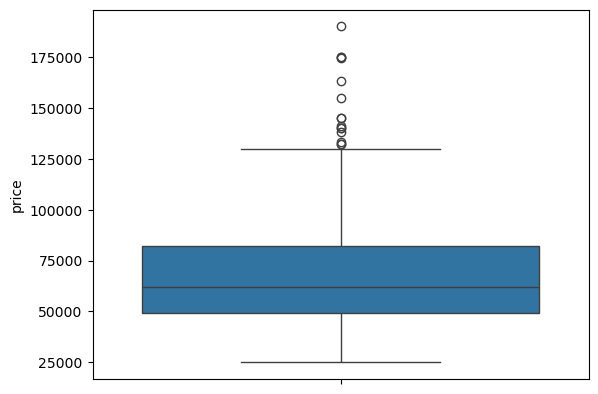

In [66]:
# sns.displot(df['Fare'], kde= False, bins = 20)
sns.boxplot(y='price', data= df )

In [68]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS
q1 = df.quantile(0.25)
q1

AssertionError: 

In [ ]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS
q1 = df['price'].quantile(0.25)
q1

In [ ]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS using QUANTILES
q1 = np.quantile(df['price'], 0.25)
q3 = np.quantile(df['price'], 0.75)
print(q1,q3)
IQR = q3-q1
IQR

In [72]:
### Use IQR to find lower and upper limit
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit,upper_limit)

NameError: name 'q1' is not defined

In [74]:
### Use these limits to remove instances (rows)
index_list = df.index[ (df['price'] < lower_limit) | (df['price'] > upper_limit) ]
print(index_list, len(index_list))
df = df.drop(index_list)
print(df.shape)

NameError: name 'lower_limit' is not defined

In [76]:
### STATISTICAL METHOD TO COMPUTE THE UPPER AND LOWER LIMITS using MEAN AND STANDARD DEVIATION
print("For PRICE")
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()
print("Highest allowed",upper_limit)
print("Lowest allowed",lower_limit)
print(upper_limit,lower_limit)
## Applying the limits
df["price"] = np.where (df["price"] <lower_limit, lower_limit,df['price'])
df["price"] = np.where (df["price"] >upper_limit, upper_limit,df['price'])

# np.where(if Condition is True, return value1, else return value2 )

print(df.shape)

For PRICE
Highest allowed 148229.60984698182
Lowest allowed -11986.415707787673
148229.60984698182 -11986.415707787673
(546, 11)


In [78]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
0,42000.0,5850,3.0,1,2,yes,no,yes,no,1,no
1,38500.0,4000,2.0,1,1,yes,no,no,no,0,no
2,49500.0,3060,3.0,1,1,yes,no,no,no,0,no
3,60500.0,6650,3.0,1,2,yes,yes,no,no,0,no
4,61000.0,6360,3.0,1,1,yes,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3.0,2,4,yes,yes,no,yes,0,no
542,94000.0,6000,3.0,2,4,yes,no,no,yes,0,no
543,103000.0,6000,3.0,2,4,yes,yes,no,yes,1,no
544,105000.0,6000,3.0,2,2,yes,yes,no,yes,1,no


In [80]:
### Call reset_index
df = df.reset_index(drop = True)
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
0,42000.0,5850,3.0,1,2,yes,no,yes,no,1,no
1,38500.0,4000,2.0,1,1,yes,no,no,no,0,no
2,49500.0,3060,3.0,1,1,yes,no,no,no,0,no
3,60500.0,6650,3.0,1,2,yes,yes,no,no,0,no
4,61000.0,6360,3.0,1,1,yes,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3.0,2,4,yes,yes,no,yes,0,no
542,94000.0,6000,3.0,2,4,yes,no,no,yes,0,no
543,103000.0,6000,3.0,2,4,yes,yes,no,yes,1,no
544,105000.0,6000,3.0,2,2,yes,yes,no,yes,1,no


### Skewness
[Check Skewness](https://www.investopedia.com/terms/s/skewness.asp)

In [83]:
df.skew(numeric_only=True)

price       0.960622
lotsize     1.322758
bedrooms    0.494881
bathrms     1.592096
stories     1.074657
garagepl    0.844808
dtype: float64

In [85]:
### Just df.skew() raises a warning. So selcted columns need to be given
df[['price', 'lotsize', 'bedrooms', 'bathrms']].skew()

price       0.960622
lotsize     1.322758
bedrooms    0.494881
bathrms     1.592096
dtype: float64

In [87]:
print(df['lotsize'].describe())
df['lotsize'].value_counts()

count      546.000000
mean      5150.265568
std       2168.158725
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: lotsize, dtype: float64


lotsize
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
2640     1
3792     1
4200     1
2817     1
6525     1
Name: count, Length: 284, dtype: int64

4600.0
16200
1650
5150.2655677655675
lotsize feature seems to be skewed....
1.3227579632815256
lotsize feature is right skewed....


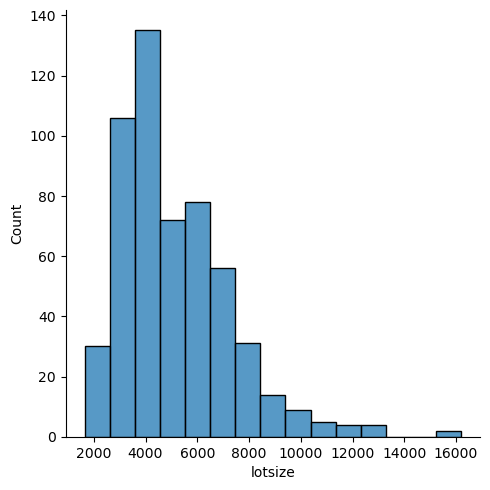

In [89]:
sns.displot(x='lotsize', data= df, bins=15 )
print(df['lotsize'].median())
print(df['lotsize'].max())
print(df['lotsize'].min())
print(df['lotsize'].mean())
print("lotsize feature seems to be skewed....")

### Compute skewness
print(df['lotsize'].skew())
print("lotsize feature is right skewed....")

0.13316541570927654


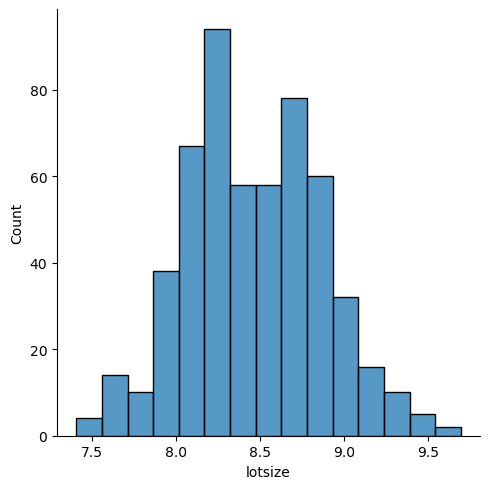

In [91]:
lotsize_log = np.log(df['lotsize'] + 1)
print(lotsize_log.skew())
sns.displot(x=lotsize_log,bins=15)
df['lotsize'] = lotsize_log
# sns.displot(x='lotsize', data= df, bins=15 )

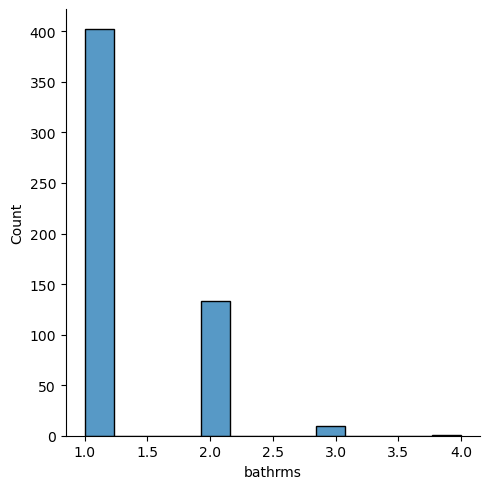

In [93]:
# print("Following features are moderately skewed")
sns.displot(x='bathrms', data= df )   # moderately

Following features are symmetric


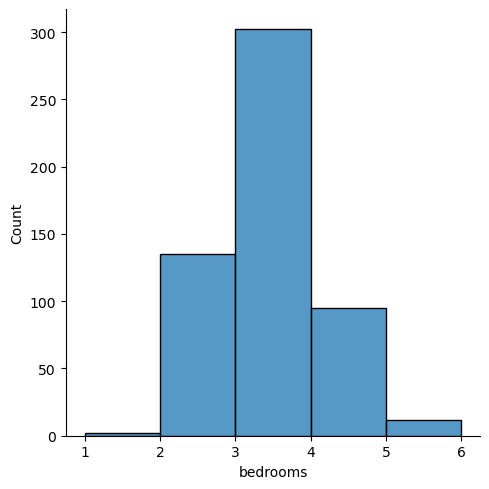

In [95]:
print("Following features are symmetric")
sns.displot(x='bedrooms', data= df, bins=5)

### Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [100]:
print(df['lotsize'].max(), df['lotsize'].min())

9.692828247710418 7.409136443920128


In [102]:
print(df['bathrms'].max(), df['bathrms'].min())

4 1


In [104]:
print(df['bedrooms'].max(), df['bedrooms'].min())

6.0 1.0


In [106]:
### Using MinMaxScaler() for Min Max Scaling

# scaler=MinMaxScaler(feature_range=(-1,1))   # a=-1, b=1
scaler=MinMaxScaler(feature_range=(0,100))   # a=0, b=100

# scaler = StandardScaler()   # a=0, b=1
column_list = ['lotsize','bathrms','bedrooms',]
X = df[ column_list ]
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=column_list)

print(X_scaled[-10:,:])
df.tail(10)


[[56.51134514 33.33333333 40.        ]
 [46.74199307  0.         40.        ]
 [60.01575361 33.33333333 40.        ]
 [65.217459   33.33333333 60.        ]
 [60.18382301 33.33333333 40.        ]
 [46.74199307 33.33333333 40.        ]
 [56.51134514 33.33333333 40.        ]
 [56.51134514 33.33333333 40.        ]
 [56.51134514 33.33333333 40.        ]
 [56.51134514  0.         40.        ]]


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
536,82500.0,8.699681,3.0,2,4,yes,no,no,yes,0,no
537,83000.0,8.476580,3.0,1,3,yes,no,no,yes,0,no
538,84000.0,8.779711,3.0,2,3,yes,no,no,yes,0,no
539,85000.0,8.898502,4.0,2,2,yes,no,no,no,0,no
540,85000.0,8.783549,3.0,2,4,yes,no,no,no,1,no
541,91500.0,8.476580,3.0,2,4,yes,yes,no,yes,0,no
542,94000.0,8.699681,3.0,2,4,yes,no,no,yes,0,no
543,103000.0,8.699681,3.0,2,4,yes,yes,no,yes,1,no
544,105000.0,8.699681,3.0,2,2,yes,yes,no,yes,1,no
545,105000.0,8.699681,3.0,1,2,yes,no,no,yes,1,no


In [108]:
for col in column_list:
    df[col] = X_scaled_df[col]
df[column_list].tail(10)


,lotsize,bathrms,bedrooms
536,56.511345,33.333333,40.0
537,46.741993,0.000000,40.0
538,60.015754,33.333333,40.0
539,65.217459,33.333333,60.0
540,60.183823,33.333333,40.0
541,46.741993,33.333333,40.0
542,56.511345,33.333333,40.0
543,56.511345,33.333333,40.0
544,56.511345,33.333333,40.0
545,56.511345,0.000000,40.0


In [110]:
### Scaling as per the usual equations for scaling

In [112]:
y1 = df['price']

In [114]:
# (A) Min-Max Scaling (a and b may be assigned by us)
a = -1
b = 1
y1_new = a + ( (y1 - min(y1))/(max(y1)-min(y1)) * (b-a) )
print(y1_new.max())
print(y1_new.min())
# df['price'] = y1_new  ### Commented for now
y1_new

1.0
-1.0


0     -0.724092
1     -0.780897
2     -0.602368
3     -0.423840
4     -0.415725
         ...   
541    0.079286
542    0.119861
543    0.265930
544    0.298389
545    0.298389
Name: price, Length: 546, dtype: float64

In [116]:
# (A) Min-Max Scaling (a=0, b=1)
y1_new = (y1-min(y1))/(max(y1)-min(y1))
print(y1_new.max())
print(y1_new.min())
# df['Fare'] = y1_new
y1_new

1.0
0.0


0      0.137954
1      0.109552
2      0.198816
3      0.288080
4      0.292138
         ...   
541    0.539643
542    0.559930
543    0.632965
544    0.649195
545    0.649195
Name: price, Length: 546, dtype: float64

In [118]:
# (B) Mean Normalization
y1_new = (y1- np.mean(y1))/ (max(y1) - min(y1))
print(y1_new.max())
print(y1_new.min())
print(np.mean(y1_new))
y1_new

0.6521982963891819
-0.3478017036108181
2.6027206438098908e-17


0     -0.209848
1     -0.238250
2     -0.148986
3     -0.059722
4     -0.055664
         ...   
541    0.191841
542    0.212129
543    0.285163
544    0.301393
545    0.301393
Name: price, Length: 546, dtype: float64

In [120]:
# (C) Standardization (Z-score Normalization)
y1_new = (y1- np.mean(y1))/ np.std(y1)
print(y1_new.max())
print(y1_new.min())
print(np.mean(y1_new))   ### Value close to 0
print(np.std(y1_new))   ### Value close to 1

3.1234557791505466
-1.6656640275757004
1.3013603219049455e-16
1.0000000000000004


In [122]:
# (D) Robust Scaling
q1 = np.quantile(df['price'], 0.25)
q3 = np.quantile(df['price'], 0.75)
print(q1,q3)
IQR = q3-q1
IQR
y1_new = (y1-np.median(y1))/IQR
print(y1_new.max())
print(y1_new.min())

49125.0 82000.0
2.6229539116952645
-1.1254752851711027


In [124]:
## Make a choice of proper Scaling method

### Data Encoding using Classes for Encoding from sklearn.preprocessing

In [127]:
print(df['recroom'].value_counts())
df.head()

recroom
no     449
yes     97
Name: count, dtype: int64


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
0,42000.0,55.402897,40.0,0.0,2,yes,no,yes,no,1,no
1,38500.0,38.760185,20.0,0.0,1,yes,no,no,no,0,no
2,49500.0,27.033442,40.0,0.0,1,yes,no,no,no,0,no
3,60500.0,61.014628,40.0,0.0,2,yes,yes,no,no,0,no
4,61000.0,59.062455,40.0,0.0,1,yes,no,no,no,0,no


### Label Encoding applied to our column in dataset

In [130]:
from sklearn.preprocessing import LabelEncoder

print(df['recroom'].unique())

rec_encoder = LabelEncoder()
print(df['recroom'])

rec_encoder = rec_encoder.fit(df['recroom']) ### Mapping Table created
print(rec_encoder.classes_)
rec_values = rec_encoder.transform(df['recroom'])
# ### Re-assign encoded values to the 'Sex' column
df['recroom'] = rec_values


['no', 'yes']
Categories (2, object): ['no', 'yes']
0       no
1       no
2       no
3      yes
4       no
      ... 
541    yes
542     no
543    yes
544    yes
545     no
Name: recroom, Length: 546, dtype: category
Categories (2, object): ['no', 'yes']
['no' 'yes']


In [132]:
rec_values

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [134]:
df['airco'].value_counts()
airco_encoder = LabelEncoder()
airco_values = airco_encoder.fit_transform(df['airco'])


In [136]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
0,42000.0,55.402897,40.0,0.000000,2,yes,0,yes,no,1,no
1,38500.0,38.760185,20.0,0.000000,1,yes,0,no,no,0,no
2,49500.0,27.033442,40.0,0.000000,1,yes,0,no,no,0,no
3,60500.0,61.014628,40.0,0.000000,2,yes,1,no,no,0,no
4,61000.0,59.062455,40.0,0.000000,1,yes,0,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,46.741993,40.0,33.333333,4,yes,1,no,yes,0,no
542,94000.0,56.511345,40.0,33.333333,4,yes,0,no,yes,0,no
543,103000.0,56.511345,40.0,33.333333,4,yes,1,no,yes,1,no
544,105000.0,56.511345,40.0,33.333333,2,yes,1,no,yes,1,no


In [138]:
rec_values[:5]

array([0, 0, 0, 1, 0])

In [140]:
print("The inverse from the encoding for ", rec_values[:5], ' Last five values ' )
print("The inverse from the encoding result:", rec_encoder.inverse_transform(rec_values[:5]))

The inverse from the encoding for  [0 0 0 1 0]  Last five values 
The inverse from the encoding result: ['no' 'no' 'no' 'yes' 'no']


### OneHot Encoding applied to our column in dataset

In [143]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
0,42000.0,55.402897,40.0,0.000000,2,yes,0,yes,no,1,no
1,38500.0,38.760185,20.0,0.000000,1,yes,0,no,no,0,no
2,49500.0,27.033442,40.0,0.000000,1,yes,0,no,no,0,no
3,60500.0,61.014628,40.0,0.000000,2,yes,1,no,no,0,no
4,61000.0,59.062455,40.0,0.000000,1,yes,0,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,46.741993,40.0,33.333333,4,yes,1,no,yes,0,no
542,94000.0,56.511345,40.0,33.333333,4,yes,0,no,yes,0,no
543,103000.0,56.511345,40.0,33.333333,4,yes,1,no,yes,1,no
544,105000.0,56.511345,40.0,33.333333,2,yes,1,no,yes,1,no


In [145]:
df['driveway']

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
541    yes
542    yes
543    yes
544    yes
545    yes
Name: driveway, Length: 546, dtype: category
Categories (2, object): ['no', 'yes']

In [147]:
# print(df.iloc[ [0:5],  ['fullbase'] ])
print(pd.get_dummies(df['driveway']))

        no   yes
0    False  True
1    False  True
2    False  True
3    False  True
4    False  True
..     ...   ...
541  False  True
542  False  True
543  False  True
544  False  True
545  False  True

[546 rows x 2 columns]


In [149]:
cat_col_list = ['fullbase','airco','driveway' ]

pd.get_dummies(df[ cat_col_list ] )


,fullbase_no,fullbase_yes,airco_no,airco_yes,driveway_no,driveway_yes
0,False,True,True,False,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,True
3,True,False,True,False,False,True
4,True,False,True,False,False,True
...,...,...,...,...,...,...
541,True,False,False,True,False,True
542,True,False,False,True,False,True
543,True,False,False,True,False,True
544,True,False,False,True,False,True


In [151]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,airco,garagepl,prefarea
0,42000.0,55.402897,40.0,0.000000,2,yes,0,yes,no,1,no
1,38500.0,38.760185,20.0,0.000000,1,yes,0,no,no,0,no
2,49500.0,27.033442,40.0,0.000000,1,yes,0,no,no,0,no
3,60500.0,61.014628,40.0,0.000000,2,yes,1,no,no,0,no
4,61000.0,59.062455,40.0,0.000000,1,yes,0,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,46.741993,40.0,33.333333,4,yes,1,no,yes,0,no
542,94000.0,56.511345,40.0,33.333333,4,yes,0,no,yes,0,no
543,103000.0,56.511345,40.0,33.333333,4,yes,1,no,yes,1,no
544,105000.0,56.511345,40.0,33.333333,2,yes,1,no,yes,1,no


In [153]:
dummies_df = pd.get_dummies(df[ cat_col_list])


df.drop(cat_col_list, axis = 1, inplace=True)

new_cols_list = dummies_df.columns
print(new_cols_list)                        
df[new_cols_list] = dummies_df[new_cols_list].copy()                           

Index(['fullbase_no', 'fullbase_yes', 'airco_no', 'airco_yes', 'driveway_no',
       'driveway_yes'],
      dtype='object')


In [155]:
df

,price,lotsize,bedrooms,bathrms,stories,recroom,garagepl,prefarea,fullbase_no,fullbase_yes,airco_no,airco_yes,driveway_no,driveway_yes
0,42000.0,55.402897,40.0,0.000000,2,0,1,no,False,True,True,False,False,True
1,38500.0,38.760185,20.0,0.000000,1,0,0,no,True,False,True,False,False,True
2,49500.0,27.033442,40.0,0.000000,1,0,0,no,True,False,True,False,False,True
3,60500.0,61.014628,40.0,0.000000,2,1,0,no,True,False,True,False,False,True
4,61000.0,59.062455,40.0,0.000000,1,0,0,no,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,46.741993,40.0,33.333333,4,1,0,no,True,False,False,True,False,True
542,94000.0,56.511345,40.0,33.333333,4,0,0,no,True,False,False,True,False,True
543,103000.0,56.511345,40.0,33.333333,4,1,1,no,True,False,False,True,False,True
544,105000.0,56.511345,40.0,33.333333,2,1,1,no,True,False,False,True,False,True


### Ordinal Encoding applied to our column in dataset

Important Note: 
Actually, SCALING may be done/not should be applied for every numeric feature of dataset (particularly if their range varies a lot), when working on DATA SCIENCE PROJECT depending on ML algorithm to be used further .

Also, ENCODING needs to be done for each and every categorical(non-numeric) feature, when working on DATA SCIENCE PROJECT.


In [159]:
from sklearn.preprocessing import OrdinalEncoder


In [161]:
print(df['prefarea'].unique())
df['prefarea'] = df['prefarea'].astype('object')

['no' 'yes']


In [163]:
df['prefarea']

0      no
1      no
2      no
3      no
4      no
       ..
541    no
542    no
543    no
544    no
545    no
Name: prefarea, Length: 546, dtype: object

In [165]:
mapping = {"no":1, "yes":0 }
# mapping = {'most likely':5, 'more likely':4, 'likely':3, 'less likely':2, 'least likely':1}

In [167]:
df["prefarea"] = df["prefarea"].map(mapping)
# df["new_driveway"] = df["driveway"].replace(mapping)

In [169]:
df['prefarea']

0      1
1      1
2      1
3      1
4      1
      ..
541    1
542    1
543    1
544    1
545    1
Name: prefarea, Length: 546, dtype: int64

In [171]:
df

,price,lotsize,bedrooms,bathrms,stories,recroom,garagepl,prefarea,fullbase_no,fullbase_yes,airco_no,airco_yes,driveway_no,driveway_yes
0,42000.0,55.402897,40.0,0.000000,2,0,1,1,False,True,True,False,False,True
1,38500.0,38.760185,20.0,0.000000,1,0,0,1,True,False,True,False,False,True
2,49500.0,27.033442,40.0,0.000000,1,0,0,1,True,False,True,False,False,True
3,60500.0,61.014628,40.0,0.000000,2,1,0,1,True,False,True,False,False,True
4,61000.0,59.062455,40.0,0.000000,1,0,0,1,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,46.741993,40.0,33.333333,4,1,0,1,True,False,False,True,False,True
542,94000.0,56.511345,40.0,33.333333,4,0,0,1,True,False,False,True,False,True
543,103000.0,56.511345,40.0,33.333333,4,1,1,1,True,False,False,True,False,True
544,105000.0,56.511345,40.0,33.333333,2,1,1,1,True,False,False,True,False,True


In [173]:
### Simple Similar example for Ordinal encoding

mydata = pd.DataFrame({
    'Education': ['High School','High School', 'Bachelor', 'Master', 'PhD', 'Associate','PhD','High School','Primary School']
})

custom_mapping = {
    'Primary School' : 0,
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'PhD': 5
}


mydata['Encoded_Education'] = mydata['Education'].map(custom_mapping)

print(mydata)

        Education  Encoded_Education
0     High School                  1
1     High School                  1
2        Bachelor                  3
3          Master                  4
4             PhD                  5
5       Associate                  2
6             PhD                  5
7     High School                  1
8  Primary School                  0
